In [29]:
import robot_plotter as rp
import models_functions as mf
import traj
import numpy as np
import matplotlib.pyplot as plt
import robot_sim as sim
import sim_helper_funcs as hfunc
import save_load_data as sldat

In [30]:
# Now, load the data
dt=0.01
robcol = sldat.load_object('para')

pos1 = robcol.robotlist[0].pos
pos2 = robcol.robotlist[1].pos
pos3 = robcol.robotlist[2].pos
x_log1 = robcol.robotlist[0].x_log
x_log2 = robcol.robotlist[1].x_log
x_log3 = robcol.robotlist[2].x_log
P_log1 = robcol.robotlist[0].P_log
P_log2 = robcol.robotlist[1].P_log
P_log3 = robcol.robotlist[2].P_log
nis_imu_log1 = robcol.robotlist[0].IMU_nis_log
nis_imu_log2 = robcol.robotlist[1].IMU_nis_log
nis_imu_log3 = robcol.robotlist[2].IMU_nis_log
nis_rb_log1 = robcol.robotlist[0].RB_nis_log
nis_rb_log2 = robcol.robotlist[1].RB_nis_log
nis_rb_log3 = robcol.robotlist[2].RB_nis_log
rb_ids1 = robcol.robotlist[0].rb_ids
rb_ids2 = robcol.robotlist[1].rb_ids
rb_ids3 = robcol.robotlist[2].rb_ids

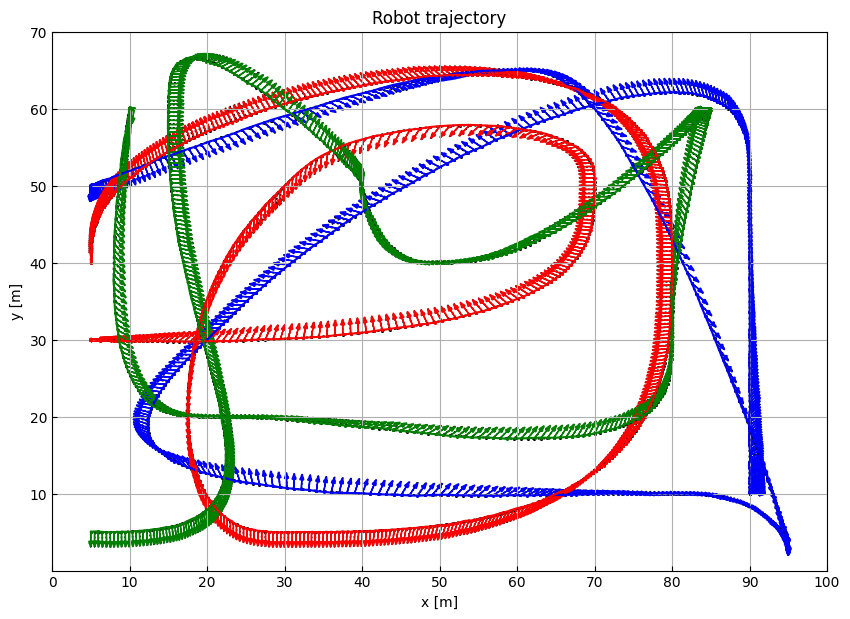

In [31]:
# And plot:
s_idx = 0

# Plot ground truth
fig, ax = rp.setup_plot()
rp.plot_position(ax, pos1[:,::100], color='black', marker=None, linestyle=':', label='Robot 1 reference')
rp.plot_position(ax, pos2[:,::100], color='black', marker=None, linestyle=':', label='Robot 2 reference')
rp.plot_position(ax, pos3[:,::100], color='black', marker=None, linestyle=':', label='Robot 3 reference')

# Plot states of robots:
rp.plot_position2(ax, x_log1[:,::100,s_idx], None, color='blue', marker=None, label='Robot 1 trajectory')
rp.plot_position2(ax, x_log2[:,::100,s_idx], None, color='red', marker=None, label='Robot 2 trajectory')
rp.plot_position2(ax, x_log3[:,::100,s_idx], None, color='green', marker=None, label='Robot 3 trajectory')
# P_log3[:,:,::100,s_idx]


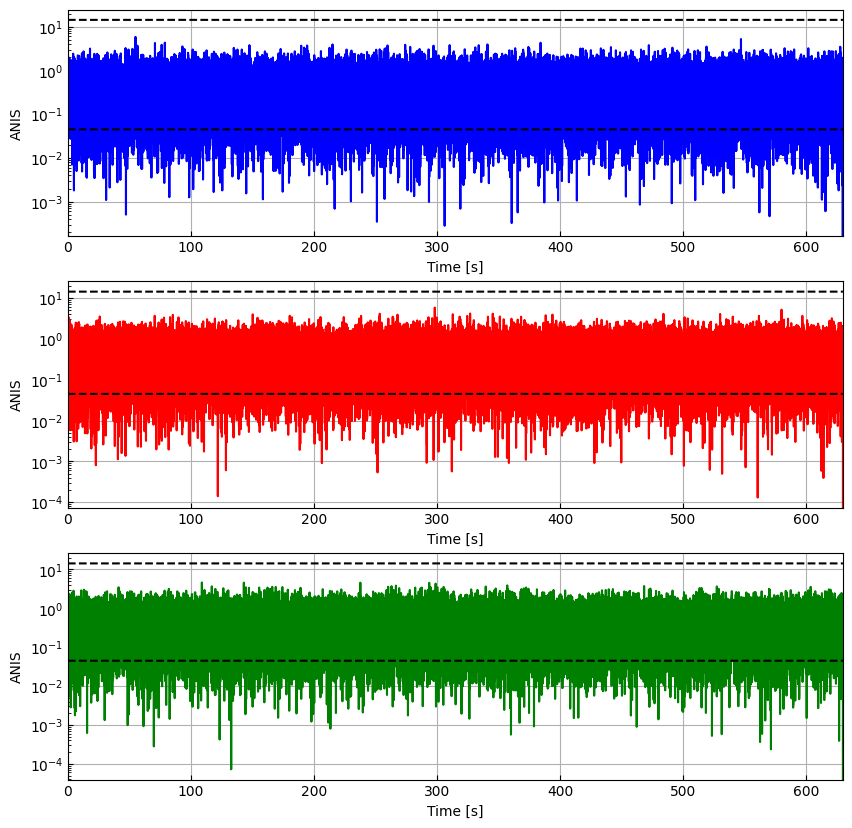

In [32]:
# ANIS analysis
fig, axnis = plt.subplots(3, figsize=(10,10))
# Three df
rp.plot_ANIS(ax=axnis[0], nis=nis_imu_log1, df=3, dt=dt, prob=0.995, color='blue')
rp.plot_ANIS(ax=axnis[1], nis=nis_imu_log2, df=3, dt=dt, prob=0.995, color='red')
rp.plot_ANIS(ax=axnis[2], nis=nis_imu_log3, df=3, dt=dt, prob=0.995, color='green')

Text(0.5, 1.0, 'Robot 3')

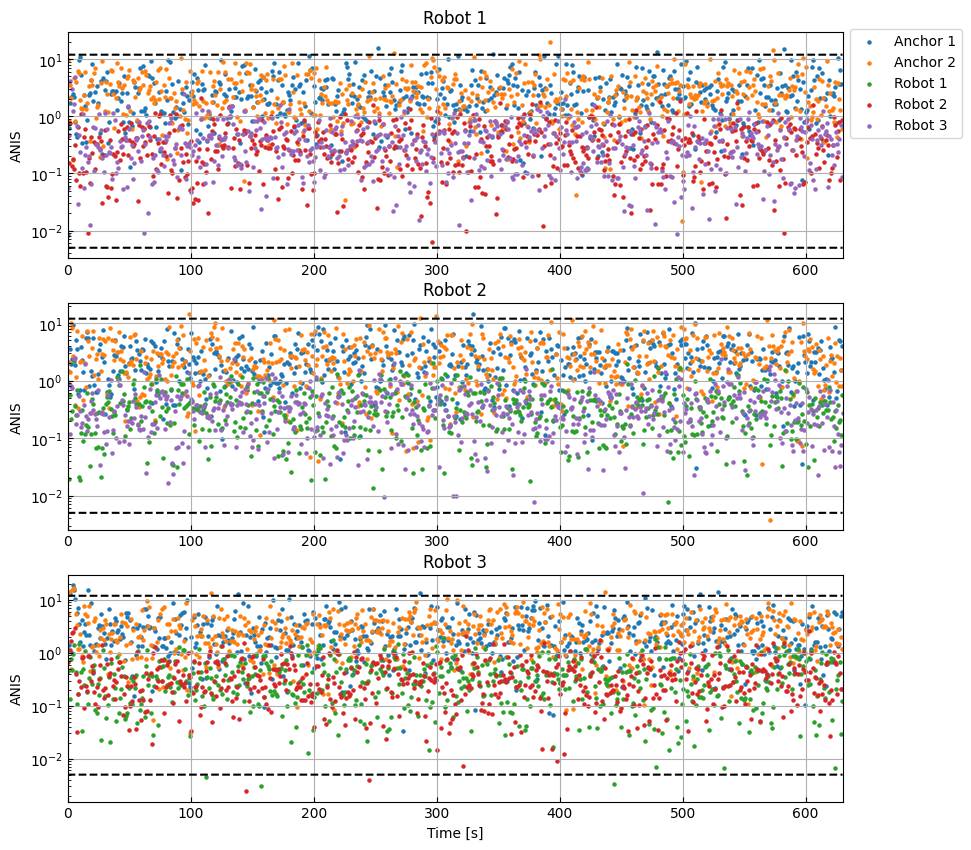

In [33]:
# ANIS analysis
fig, axnis = plt.subplots(3, figsize=(10,10))
# Three df
df = 2
rp.plot_ANIS_rb(ax=axnis[0], 
                nis=nis_rb_log1, 
                rb_ids=rb_ids1, 
                pos_ids=[1, 2, 111, 222, 333], 
                labels=['Anchor 1', 'Anchor 2', 'Robot 1', 'Robot 2', 'Robot 3'],
                df=df, 
                dt=dt, 
                prob=0.995)
rp.plot_ANIS_rb(ax=axnis[1], 
                nis=nis_rb_log2, 
                rb_ids=rb_ids2, 
                pos_ids=[1, 2, 111, 222, 333], 
                labels=['Anchor 1', 'Anchor 2', 'Robot 1', 'Robot 2', 'Robot 3'],
                df=df, 
                dt=dt, 
                prob=0.995)
rp.plot_ANIS_rb(ax=axnis[2], 
                nis=nis_rb_log3, 
                rb_ids=rb_ids3, 
                pos_ids=[1, 2, 111, 222, 333], 
                labels=['Anchor 1', 'Anchor 2', 'Robot 1', 'Robot 2', 'Robot 3'],
                df=df, 
                dt=dt, 
                prob=0.995)

axnis[0].legend(loc='lower left', bbox_to_anchor=(1, 0.5))
axnis[0].set_xlabel(None)
axnis[1].set_xlabel(None)
axnis[0].set_title('Robot 1')
axnis[1].set_title('Robot 2')
axnis[2].set_title('Robot 3')